In [1]:
import numpy as np
import pandas as pd

In [2]:
from utils import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

>> If Running for the first time Uncomment and run the following cell

In [4]:
## train_load,test_load = load_dataset(False)

# **SVM**

<p>Implement linear and kernel SVM on MNIST dataset. You have to try different
kernels (linear, polynomial, RBF) and compare results in your report. You can apply PCA and LDA here for
dimensionality reduction.</p>

>> Set options here to check variations with parameters:

In [5]:
from mlxtend.data import loadlocal_mnist
from sklearn.preprocessing import StandardScaler
import platform

train_X, train_y = loadlocal_mnist(
            images_path='dataset/MNIST/raw/train-images-idx3-ubyte', 
            labels_path='dataset/MNIST/raw/train-labels-idx1-ubyte')

test_X, test_y = loadlocal_mnist(
            images_path='dataset/MNIST/raw/t10k-images-idx3-ubyte', 
            labels_path='dataset/MNIST/raw/t10k-labels-idx1-ubyte')

## Normalize Data:
sc = StandardScaler()

## First fit then transform
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [6]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

target_names = ['0', '1', '2','3','4','5','6','7','8','9']
def svm(reduction,kernel,train_data,test_data,train_labels,test_labels):
    """ Kernel can be : {'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'}"""
    from sklearn.svm import SVC
    match reduction:
        case 'pca':
            from sklearn.decomposition import KernelPCA
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
            #  {'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'}
            pca = KernelPCA(n_components=100,kernel=kernel)
            train_data = pca.fit_transform(train_data)
            test_data = pca.transform(test_data)
            print('PCA transform complete')
        case 'lda':
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            # solver : {'svd', 'lsqr', 'eigen'}, default='svd'
            lda = LinearDiscriminantAnalysis(solver='svd',n_components=9)
            train_data = lda.fit_transform(train_data,train_labels)
            test_data = lda.transform(test_data)
        case _:
            pass
        
    classifier = SVC(kernel = kernel)
    print('Training with ',reduction,kernel,'SVM')
    classifier.fit(train_data,train_labels)
    return classifier,train_data,test_data

def get_model_output(classifier,train_X,test_X,train_labels,test_labels):
    print('--- Testing ---')
    prediction_train= classifier.predict(train_X)
    prediction_test= classifier.predict(test_X)
    print('-'*10,'\nTrain metrics')
    print('Train Accuraccy: ',accuracy_score(train_labels, prediction_train))
    print(classification_report(train_labels, prediction_train, target_names=target_names))
    print('-'*10,'\nTest metrics')
    print('Test Accuraccy: ',accuracy_score(test_labels, prediction_test))
    print(classification_report(test_labels, prediction_test, target_names=target_names))
    sns.heatmap(confusion_matrix(test_labels, prediction_test), annot=True)


In [7]:
seq = np.random.randint(0,60000,20000)
train_sampled_X = train_X[seq]
train_sampled_y = train_y[seq]

In [8]:
from collections import Counter
print("Count per class in train and test data:\n\tTrain: ",Counter(train_sampled_y),"\n\tTest: ",Counter(test_y))

Count per class in train and test data:
	Train:  Counter({1: 2262, 7: 2053, 3: 2025, 2: 1988, 6: 1986, 4: 1968, 9: 1964, 8: 1962, 0: 1952, 5: 1840}) 
	Test:  Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


>> SVM with PCA - Linear kernel

PCA transform complete
Training with  pca linear SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.96335
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1984
           1       0.98      0.99      0.98      2206
           2       0.96      0.96      0.96      2000
           3       0.93      0.94      0.93      2092
           4       0.97      0.97      0.97      1976
           5       0.95      0.94      0.94      1784
           6       0.99      0.99      0.99      1995
           7       0.97      0.96      0.96      2095
           8       0.96      0.93      0.95      1903
           9       0.95      0.94      0.94      1965

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

---------- 
Test metrics
Test Accuraccy:  0.9251
              precision    recall  f1-score   support

           0    

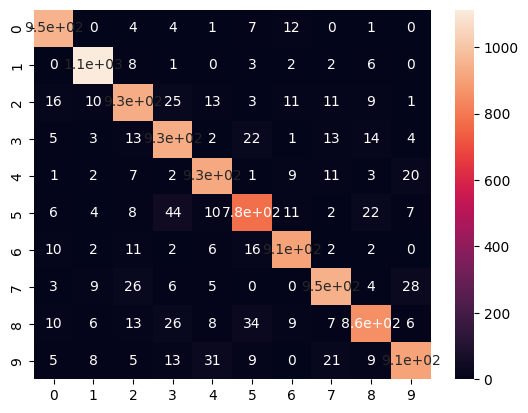

In [12]:
classifier,tr_x,tst_x = svm('pca','linear',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)

>> SVM with PCA - RBF kernel

PCA transform complete
Training with  pca rbf SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.96545
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1984
           1       0.99      0.99      0.99      2206
           2       0.97      0.94      0.96      2000
           3       0.98      0.94      0.96      2092
           4       0.98      0.97      0.98      1976
           5       0.98      0.95      0.97      1784
           6       0.95      0.97      0.96      1995
           7       0.87      0.99      0.92      2095
           8       0.99      0.96      0.98      1903
           9       0.98      0.95      0.96      1965

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000

---------- 
Test metrics
Test Accuraccy:  0.9453
              precision    recall  f1-score   support

           0       

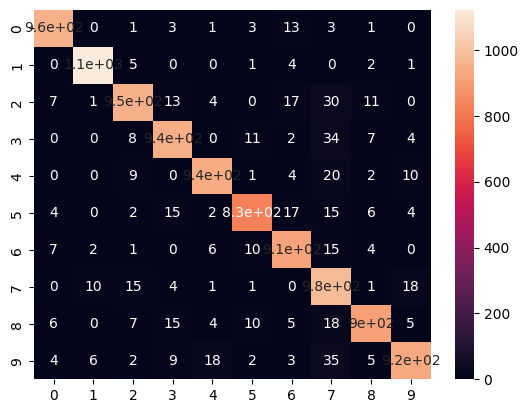

In [13]:
classifier,tr_x,tst_x = svm('pca','rbf',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)


>> SVM with PCA - Polynomial kernel

PCA transform complete
Training with  pca poly SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.11625
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1984
           1       0.11      1.00      0.20      2206
           2       1.00      0.00      0.01      2000
           3       1.00      0.01      0.01      2092
           4       1.00      0.00      0.00      1976
           5       1.00      0.01      0.02      1784
           6       1.00      0.01      0.02      1995
           7       1.00      0.02      0.03      2095
           8       1.00      0.01      0.01      1903
           9       1.00      0.01      0.01      1965

    accuracy                           0.12     20000
   macro avg       0.91      0.11      0.03     20000
weighted avg       0.90      0.12      0.03     20000

---------- 
Test metrics
Test Accuraccy:  0.115
              precision    recall  f1-score   support

           0       

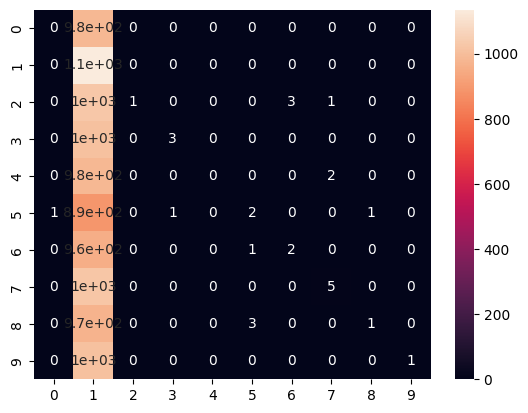

In [14]:
classifier,tr_x,tst_x = svm('pca','poly',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)

>> SVM linear kernel with LDA

Training with  lda linear SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.8974
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1984
           1       0.94      0.95      0.94      2206
           2       0.89      0.90      0.89      2000
           3       0.88      0.88      0.88      2092
           4       0.91      0.93      0.92      1976
           5       0.82      0.81      0.81      1784
           6       0.95      0.94      0.95      1995
           7       0.91      0.90      0.91      2095
           8       0.86      0.81      0.83      1903
           9       0.86      0.85      0.86      1965

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

---------- 
Test metrics
Test Accuraccy:  0.8778
              precision    recall  f1-score   support

           0       0.92      0.97      0

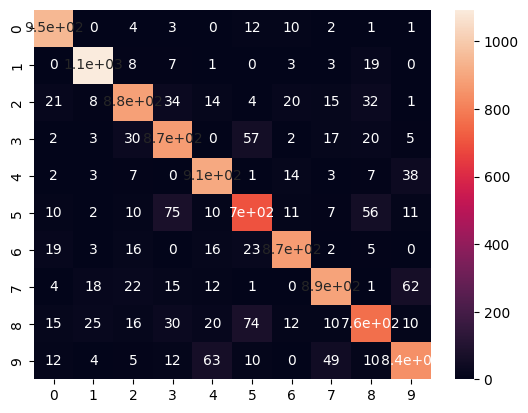

In [15]:
classifier,tr_x,tst_x = svm('lda','linear',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)

>> SVM rbf kernel with LDA

Training with  lda linear SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.8974
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1984
           1       0.94      0.95      0.94      2206
           2       0.89      0.90      0.89      2000
           3       0.88      0.88      0.88      2092
           4       0.91      0.93      0.92      1976
           5       0.82      0.81      0.81      1784
           6       0.95      0.94      0.95      1995
           7       0.91      0.90      0.91      2095
           8       0.86      0.81      0.83      1903
           9       0.86      0.85      0.86      1965

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

---------- 
Test metrics
Test Accuraccy:  0.8778
              precision    recall  f1-score   support

           0       0.92      0.97      0

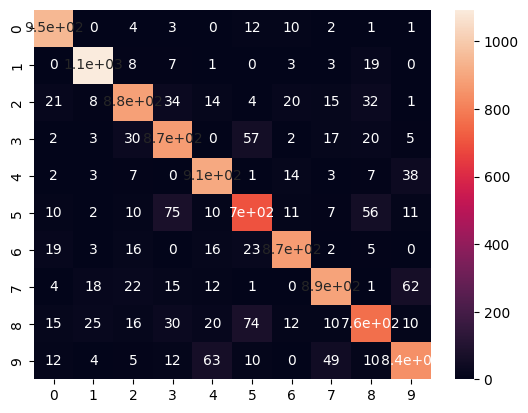

In [16]:
classifier,tr_x,tst_x = svm('lda','linear',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)

>> SVM poly kernel with LDA

Training with  lda linear SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.8974
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1984
           1       0.94      0.95      0.94      2206
           2       0.89      0.90      0.89      2000
           3       0.88      0.88      0.88      2092
           4       0.91      0.93      0.92      1976
           5       0.82      0.81      0.81      1784
           6       0.95      0.94      0.95      1995
           7       0.91      0.90      0.91      2095
           8       0.86      0.81      0.83      1903
           9       0.86      0.85      0.86      1965

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

---------- 
Test metrics
Test Accuraccy:  0.8778
              precision    recall  f1-score   support

           0       0.92      0.97      0

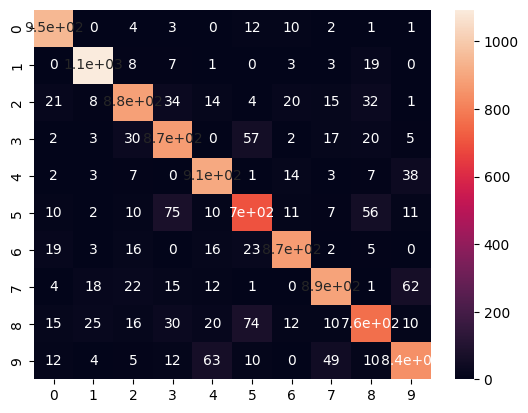

In [17]:
classifier,tr_x,tst_x = svm('lda','linear',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)

>> Linear SVM without Dimensionality reduction

Training with  - linear SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.99945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1984
           1       1.00      1.00      1.00      2206
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2092
           4       1.00      1.00      1.00      1976
           5       1.00      1.00      1.00      1784
           6       1.00      1.00      1.00      1995
           7       1.00      1.00      1.00      2095
           8       1.00      1.00      1.00      1903
           9       1.00      1.00      1.00      1965

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

---------- 
Test metrics
Test Accuraccy:  0.9209
              precision    recall  f1-score   support

           0       0.94      0.98      0.

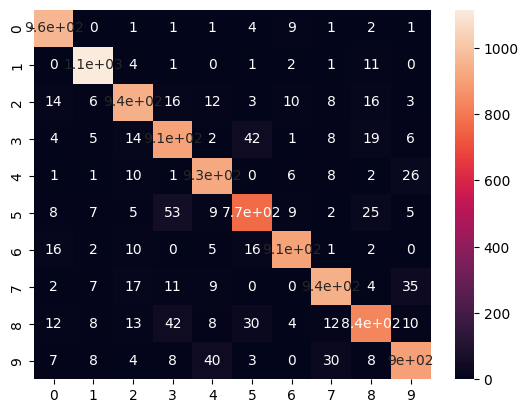

In [18]:
classifier,tr_x,tst_x = svm('-','linear',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)

>> RBF Kernel SVM without Dimensionality reduction

Training with  - rbf SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.98525
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1984
           1       0.98      0.99      0.99      2206
           2       0.99      0.99      0.99      2000
           3       0.98      0.98      0.98      2092
           4       0.98      0.99      0.98      1976
           5       0.99      0.98      0.99      1784
           6       0.99      0.99      0.99      1995
           7       0.98      0.98      0.98      2095
           8       0.99      0.98      0.98      1903
           9       0.98      0.97      0.97      1965

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

---------- 
Test metrics
Test Accuraccy:  0.9524
              precision    recall  f1-score   support

           0       0.97      0.98      0.98 

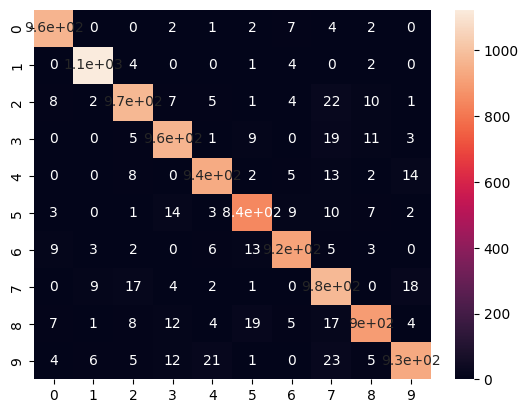

In [19]:
classifier,tr_x,tst_x = svm('-','rbf',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)

>> Polynomial Kernel SVM without Dimensionality reduction

Training with  - poly SVM
--- Testing ---
---------- 
Train metrics
Train Accuraccy:  0.9621
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1984
           1       0.98      0.98      0.98      2206
           2       0.99      0.94      0.97      2000
           3       0.98      0.96      0.97      2092
           4       0.94      0.98      0.96      1976
           5       0.99      0.95      0.97      1784
           6       0.99      0.97      0.98      1995
           7       0.99      0.94      0.97      2095
           8       0.84      0.99      0.91      1903
           9       0.94      0.95      0.95      1965

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.96      0.96     20000

---------- 
Test metrics
Test Accuraccy:  0.9322
              precision    recall  f1-score   support

           0       0.98      0.96      0.97 

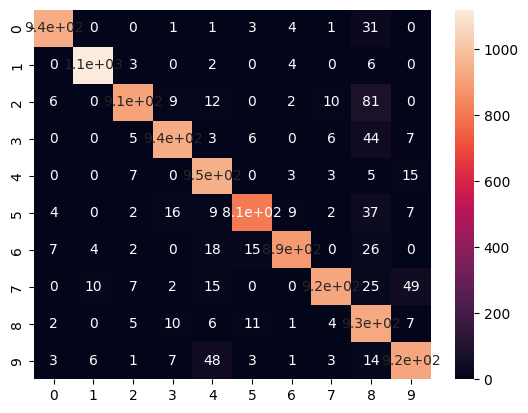

In [20]:
classifier,tr_x,tst_x = svm('-','poly',train_sampled_X,test_X,train_sampled_y,test_y)
get_model_output(classifier,tr_x,tst_x,train_sampled_y,test_y)